<a href="https://colab.research.google.com/github/prpal9122001/Pandora-Final-Project/blob/main/app.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Using localtunnel !!**



We will be using Local Tunnel today for making our python file work on streamlit.

Local Tunnel (localtunnel) exposes your localhost to the world for easy testing and sharing! We don't have to mess with DNS or deploy just to test out our app.

Great for working with browser testing tools like browserling or external api callback services like twilio which require a public url for callbacks.

==  Before going further make sure you have **uploaded both the pickle files Movie_list().pkl,similarity().pkl and LOGO.png** in your google drive.  ==

=== Now **mount google drive in this notebook as well** using same function in sidebar ===



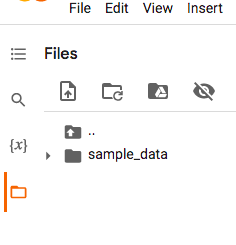

# Installing required Libraries!!

In [4]:
#installing streamlit

!pip install streamlit --q

# **Writing files!!**
Again make sure both the pickle files and logo.png are uploaded in your google drive and that drive is mounted in this notebook.

In [10]:
#writing file
%%writefile app.py
import pickle
import streamlit as st
import requests

#adding the logo by copying it's path and pasting here
from PIL import Image
image = Image.open('/content/drive/MyDrive/Logo.png')

st.image(image)

def fetch_poster(movie_id):
    url = "https://api.themoviedb.org/3/movie/{}?api_key=8265bd1679663a7ea12ac168da84d2e8&language=en-US".format(movie_id)
    data = requests.get(url)
    data = data.json()
    poster_path = data['poster_path']
    full_path = "https://image.tmdb.org/t/p/w500/" + poster_path
    return full_path

def recommend(movie):
    index = movies[movies['title'] == movie].index[0]
    distances = sorted(list(enumerate(similarity[index])), reverse=True, key=lambda x: x[1])
    recommended_movie_names = []
    recommended_movie_posters = []
    for i in distances[1:6]:
        # fetch the movie poster
        movie_id = movies.iloc[i[0]].movie_id
        recommended_movie_posters.append(fetch_poster(movie_id))
        recommended_movie_names.append(movies.iloc[i[0]].title)

    return recommended_movie_names,recommended_movie_posters
  
#fetching modules by coying their path and pasting here

movies = pickle.load(open('/content/drive/MyDrive/MRS2/movie_list (1).pkl','rb'))
similarity = pickle.load(open('/content/drive/MyDrive/MRS2/similarity.pkl','rb'))

movie_list = movies['title'].values
selected_movie = st.selectbox(
    "Feel free to Type or select a movie from the dropdown",
    movie_list
)

if st.button('Show Recommendation'):
    recommended_movie_names,recommended_movie_posters = recommend(selected_movie)
    col1, col2, col3, col4, col5 = st.beta_columns(5)
    with col1:
        st.text(recommended_movie_names[0])
        st.image(recommended_movie_posters[0])
    with col2:
        st.text(recommended_movie_names[1])
        st.image(recommended_movie_posters[1])

    with col3:
        st.text(recommended_movie_names[2])
        st.image(recommended_movie_posters[2])
    with col4:
        st.text(recommended_movie_names[3])
        st.image(recommended_movie_posters[3])
    with col5:
        st.text(recommended_movie_names[4])
        st.image(recommended_movie_posters[4])




Overwriting app.py


In [6]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Installing pyngrok!!

In [11]:
!pip install pyngrok

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [12]:
from pyngrok import ngrok

!nohup streamlit run app.py &
url = ngrok.connect(port ='8501')
print(url)

nohup: appending output to 'nohup.out'
NgrokTunnel: "http://8677-35-203-188-254.ngrok.io" -> "http://localhost:80"


# Generating URL for our Streamlit app!!

**If facing any error make sure to rerun this cell again and this url is one time therefore it should be run everytime you need to view your Streamlit app.**


In [ ]:
#select the link which says "your url is:" to view the app
#also it will take time if the system user is working on is macbook with not secure protection
!streamlit run app.py & npx localtunnel --port 8501

2022-05-28 21:10:33.538 INFO    numexpr.utils: NumExpr defaulting to 2 threads.
npx: installed 22 in 2.59s
your url is: https://funny-bushes-judge-35-203-188-254.loca.lt

  You can now view your Streamlit app in your browser.

  Network URL: http://172.28.0.2:8501
  External URL: http://35.203.188.254:8501

